# Planetary Stability

The dataset consists of 1500 artifically generated 3-planet systems.  All planets have a mass of $5M_\oplus$, which I think is roughly where the Kepler sample should peak.  They were all integrated for 1 million orbits of the inner planet (initialized at 0.05 AU), and the stable column shows whether the system survives or not.  The next two planets were initialized somewhere between 0-10 Hill radii away.  Each run records the initial orbital parameters of each of the 3 planets.  Below is a description of each column, and see below for a figure showing each angle:

* ID: Unique Identifier
* Stable: Whether system was stable after 1e6 inner orbits
* Norbits: 1e6 for all
* RH/a: The Hill radius, scaled by the semimajor axis.  This just depeneds on the planet/star mass ratio so is the same for all.

For each planet (numbered 1,2,3), we record the initial

* a: semimajor axis
* e: eccentricity
* pomega: longitude of pericenter (what direction an eccentric orbit is oriented, this is Omega + omega in figure below, useful for low inclination orbits)
* inc: inclination
* Omega: longitude of the node (how the orbital plane is oriented)
* f: true anomaly: how far the planet started from pericenter.

See below for an image showing the angles.

All planets were simply started with e and inc distributed uniformly between 0 and 0.01 (radians for inc).  

![orbits](images/orbit.png)

I made two data sets (one with ~1000 and one with ~500).  The combined dataset is called data/1e6data.csv:

In [1]:
import pandas as pd
df = pd.read_csv('../data/1e6data.csv', index_col=0)
df.tail()

,Stable,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,Omega1,...,inc2,Omega2,f2,a3,P3,e3,pomega3,inc3,Omega3,f3
ID,,,,,,,,,,,,,,,,,,,,,
1495,False,1000000.0,0.000015,0.021544,0.050077,0.011206,0.042378,-0.363560,0.011013,-0.670975,...,0.003859,3.031180,-1.069728,0.065008,0.016574,0.043620,0.502205,0.005477,0.221792,1.924513
1496,False,1000000.0,0.000015,0.021544,0.049419,0.010986,0.031753,-5.286663,0.013705,-3.133337,...,0.008787,-2.197973,-3.304425,0.060634,0.014930,0.040648,1.662655,0.003963,-0.432332,-0.462635
1497,False,1000000.0,0.000015,0.021544,0.049480,0.011006,0.069293,2.372936,0.006937,3.068393,...,0.006520,1.422740,-0.526362,0.063639,0.016054,0.058353,-1.045209,0.017926,-0.082765,0.235402
1498,False,1000000.0,0.000015,0.021544,0.049251,0.010930,0.016901,2.892971,0.016794,1.484133,...,0.014752,-2.369802,2.474110,0.061253,0.015159,0.030802,0.270703,0.034449,0.287326,-0.049500
1499,False,1000000.0,0.000015,0.021544,0.048381,0.010642,0.045662,3.261847,0.008018,1.181873,...,0.002352,1.869814,3.493080,0.064895,0.016531,0.056288,-2.734529,0.019173,-2.520570,0.150500


I tried to engineer things so about half of the systems were stable and half unstable.  This should help the analysis:

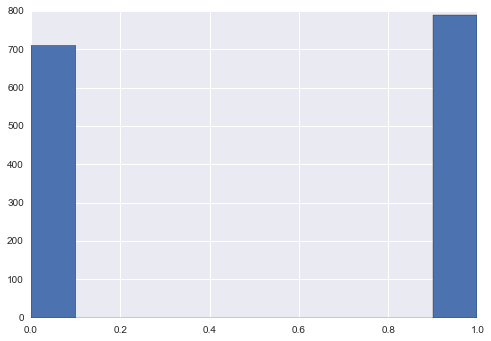

In [2]:
%matplotlib inline
import seaborn
df['Stable'].hist()

One thing we know is that the planets' separation in Hill radii should matter strongly.  Most previous worked has focused on this:

In [3]:
def minHillSep(system):
    def HillSepPair(a1,a2,rha):
        mina = min(a1, a2)
        return abs(a2-a1)/(mina*rha)
    a12 = HillSepPair(system['a1'], system['a2'], system['RH/a'])
    a23 = HillSepPair(system['a2'], system['a3'], system['RH/a'])
    return min(a12,a23)

In [4]:
df['minHillSep'] = df.apply(minHillSep, axis=1)
df.head()

,Stable,Norbits,Mplanet,RH/a,a1,P1,e1,pomega1,inc1,Omega1,...,Omega2,f2,a3,P3,e3,pomega3,inc3,Omega3,f3,minHillSep
ID,,,,,,,,,,,,,,,,,,,,,
0,True,1000000.0,0.000015,0.021544,0.050005,0.011182,0.005776,0.238565,0.004611,-0.081291,...,1.631981,-5.303298,0.066488,0.017144,0.009993,-1.222611,0.013411,1.838312,5.118309,7.087599
1,True,1000000.0,0.000015,0.021544,0.049997,0.011179,0.005504,-1.829833,0.014697,-1.078126,...,-1.144552,-1.314599,0.069424,0.018292,0.011354,3.098720,0.004279,0.624017,-5.264576,8.275992
2,False,1000000.0,0.000015,0.021544,0.047969,0.010506,0.074062,2.319163,0.006916,-0.625531,...,-1.288583,-3.124795,0.066854,0.017285,0.112981,-1.368589,0.004592,0.174013,-0.644255,7.711845
3,False,1000000.0,0.000015,0.021544,0.047724,0.010425,0.082000,2.891776,0.010222,0.869752,...,-2.319534,-2.894826,0.068622,0.017976,0.067250,-2.265014,0.006661,-0.807832,-0.372393,9.184164
4,True,1000000.0,0.000015,0.021544,0.049995,0.011179,0.004748,2.438079,0.013462,-0.013445,...,-1.016651,-3.573545,0.067997,0.017731,0.006454,2.426652,0.001658,-0.559482,-3.150335,7.714585


In [5]:
stable = df['Stable'].values
K = df['minHillSep'].values

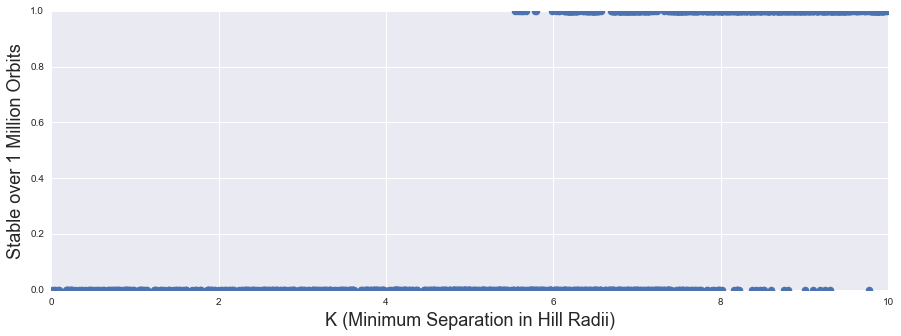

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(K, stable, '.', markersize=15)
ax.set_xlabel('K (Minimum Separation in Hill Radii)', fontsize=18)
ax.set_ylabel('Stable over 1 Million Orbits', fontsize=18)

The above shows that the separation in Hill radii isn't ALL that's going on though (otherwise I think we'd expect to see a smoother transition at some value of K from unstable to stable).  We think this picture is getting modified by resonances (near-integer ratios between orbital periods between planets).  See this plot by Alysa and Christa for Earth-mass planets, which is plotting the same thing on the x axis, but instead the time it takes for the system to go unstable on the y axis:

![instability](images/log_t_vs_beta.png)

They've shown the dips are well correlated with resonances, so that might be a good feature to try and put in (P2/P1, P3/P2, P3/P1).  The most important resonances are of the form j+1/j (e.g. 9:8), then of the form j+2/j (e.g. 7:5) etc.

Here is a histogram of the separation in Hill radii between the closest two planets of the three:

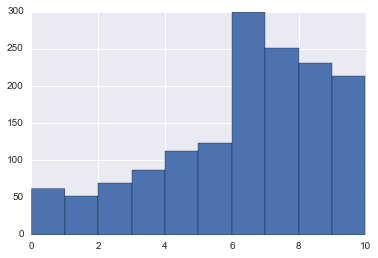

In [7]:
df['minHillSep'].hist()